<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 7: Practical - Decision Tree and Ensembles <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani Bonab - Arman Malekzadeh
    
____

### Full Name : Mehdi Lotfian
### Student Number : 99105689
### Colab Link: https://colab.research.google.com/drive/16sSFvfMhC2d95fQ3FNB-LumWDGTPgfyC?usp=sharing
___

**About the Dataset:**


Measurements of geometrical properties of kernels belonging to three different varieties of wheat.

A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

**Data Set Information:**


The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

To construct the data, seven geometric parameters of wheat kernels were measured:

- area A,
- perimeter P,
- compactness C = 4piA/P^2,
- length of kernel,
- width of kernel,
- asymmetry coefficient
- length of kernel groove.

The target column is "Type".

The data set can be used for the tasks of classification and cluster analysis.

https://archive.ics.uci.edu/ml/datasets/seeds

In [666]:
# you can use the following packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from random import choices
import math

## P1: Explore the Dataset

In [667]:
!wget -O dataset.csv https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1

--2023-06-05 21:14:54--  https://www.dropbox.com/s/xc1tbfju2mn59yj/seeds%20%281%29.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv [following]
--2023-06-05 21:14:54--  https://www.dropbox.com/s/dl/xc1tbfju2mn59yj/seeds%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc42a682a9fb578bd440eefee9e2.dl.dropboxusercontent.com/cd/0/get/B9ZTTvUzgUJRbS6hc-GGyqCzBAGW9ELZHi0Kmq5Mi71oLNhq0D_XsSXSyRDU7LNj6gTeD70uXEUiWWbCYA1zNBcvphLZWDaUo9sroovWcE5JdYu6XXkQHmHvX4N7ks0pXgEbyqKwsaq6ZXfYPx2ldqEjyy6sIae-WqozLe_nLANBSRg1nmUQV14LEDwtNvpG9jU/file?dl=1# [following]
--2023-06-05 21:14:54--  https://uc42a682a9fb578bd440eefee9e2.dl.dropboxusercontent.com/cd/0/get/B9ZTTvUzgUJRbS6hc-GGyqCzBAGW9ELZHi0K

Load the dataset as a dataframe

In [668]:
df = pd.read_csv('dataset.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Check if there are any missing values (and remove them) **(P1-1: 2 points)**

In [669]:
df.isnull().any().any()

False

Plot the heatmap of the correlation matrix between features **(P1-2: 3 points)**

In [670]:
features_df = df.drop(labels=['Type'], axis='columns')
features_df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


<Axes: >

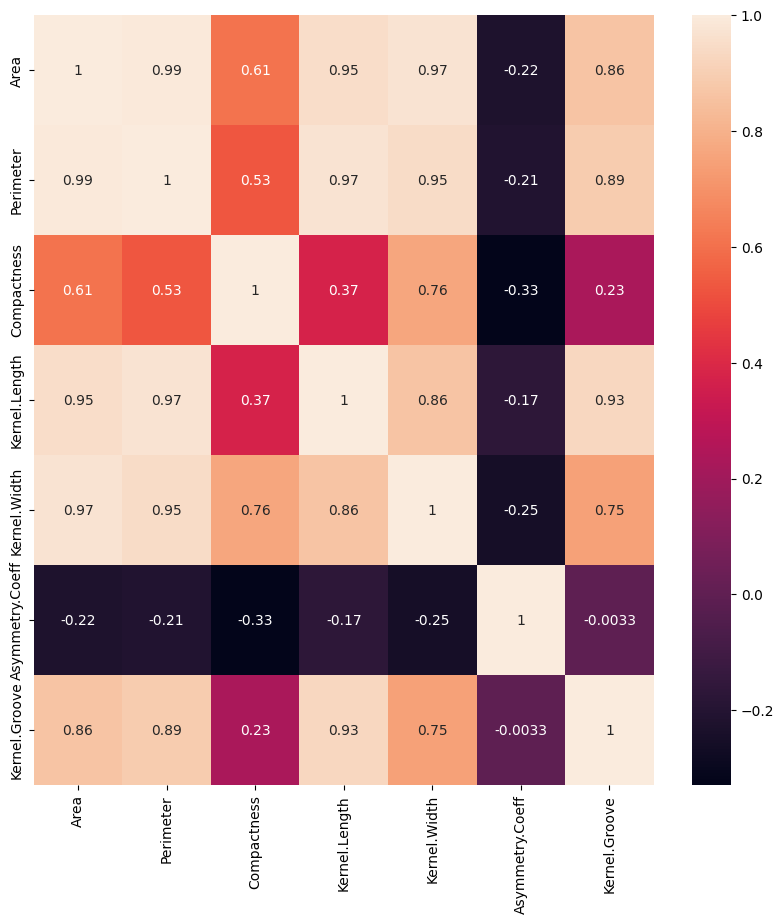

In [671]:
corr_matrix = features_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)

Remove features which are highly correlated (> 95%) with the other ones **(P1-3: 5 points)**

In [672]:
features_df_reduced = features_df.copy()
while True:
  red_corr = features_df_reduced.corr()
  features_positive_corr = red_corr.abs().to_numpy()
  for i in range(len(features_positive_corr)):
    features_positive_corr[i][i] = 0
  max_corrs = []
  for i in range(len(features_positive_corr)):
    max_corrs.append((red_corr.index[i], features_positive_corr[i].max()))
  max_corrs.sort(key=lambda x: x[1], reverse=True)
  if max_corrs[0][1] < 0.95: 
    break
  features_df_reduced = features_df_reduced.drop(max_corrs[0][0], axis=1)
features_df_reduced

,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.8710,5.763,3.312,2.221,5.220
1,0.8811,5.554,3.333,1.018,4.956
2,0.9050,5.291,3.337,2.699,4.825
3,0.8955,5.324,3.379,2.259,4.805
4,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...
194,0.8783,5.137,2.981,3.631,4.870
195,0.8511,5.140,2.795,4.325,5.003
196,0.8883,5.236,3.232,8.315,5.056
197,0.8521,5.175,2.836,3.598,5.044


Check for imbalance between classes **(P1-4: 3 points)**

In [673]:
class_counts = df['Type'].value_counts()
class_counts

2    68
1    66
3    65
Name: Type, dtype: int64

In [674]:
imbalancity_flag = False
for class_count in class_counts:
  if abs((class_count - np.mean(class_counts)) / np.mean(class_counts)) > 0.1:
    imbalancity_flag = True
print(f'Imbalancity: {imbalancity_flag}')

Imbalancity: False


## P2: Prepare the Training Data

Convert features and the target into numpy arrays **(P2-1: 2 points)**

In [675]:
y = df['Type'].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [676]:
x = features_df_reduced.to_numpy()
x

array([[0.871 , 5.763 , 3.312 , 2.221 , 5.22  ],
       [0.8811, 5.554 , 3.333 , 1.018 , 4.956 ],
       [0.905 , 5.291 , 3.337 , 2.699 , 4.825 ],
       [0.8955, 5.324 , 3.379 , 2.259 , 4.805 ],
       [0.9034, 5.658 , 3.562 , 1.355 , 5.175 ],
       [0.8951, 5.386 , 3.312 , 2.462 , 4.956 ],
       [0.8799, 5.563 , 3.259 , 3.586 , 5.219 ],
       [0.8747, 6.053 , 3.465 , 2.04  , 5.877 ],
       [0.888 , 5.884 , 3.505 , 1.969 , 5.533 ],
       [0.8696, 5.714 , 3.242 , 4.543 , 5.314 ],
       [0.8796, 5.438 , 3.201 , 1.717 , 5.001 ],
       [0.888 , 5.439 , 3.199 , 3.986 , 4.738 ],
       [0.8759, 5.479 , 3.156 , 3.136 , 4.872 ],
       [0.8744, 5.482 , 3.114 , 2.932 , 4.825 ],
       [0.8993, 5.351 , 3.333 , 4.185 , 4.781 ],
       [0.9183, 5.119 , 3.383 , 5.234 , 4.781 ],
       [0.9058, 5.527 , 3.514 , 1.599 , 5.046 ],
       [0.9153, 5.205 , 3.466 , 1.767 , 4.649 ],
       [0.8686, 5.226 , 3.049 , 4.102 , 4.914 ],
       [0.8584, 5.658 , 3.129 , 3.072 , 5.176 ],
       [0.8722, 5.52

Split the samples into training (80%) and testing (20%) arrays **(P2-2: 5 points)**

In [677]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## P3: Decision Tree Implementation

Implement desicion tree for classification from scratch **(P3-1: 20 points)**

In [678]:
class DecisionTree:

    def __init__(self, criterion="entropy", max_depth=None):
      """
      Parameters:
      
      criterion -- “gini” for the Gini impurity and “entropy” for the Information Gain. (default “entropy”)
      max_depth -- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure. (default=None)
      """
      
      self.criterion = criterion
      self.max_depth = max_depth
      self.tree = {}

    def fit(self, X, y, w=None):
      """
      Build a decision tree classifier from the training set (X, y).

      Returns:
      self : Fitted estimator
      """

      X = np.array(X)
      y = np.array(y)
      if w is None:
          w = np.ones(len(y))
      self.tree = self._build_tree(X, y, w, depth=0)
      
      return self

    def predict(self, X):
      """
      Predict class value for X.

      Returns:
      y : The predicted classes
      """
      
      X = np.array(X)
      y = [self._traverse_tree(x, self.tree) for x in X]
      
      return y

    def _build_tree(self, X, y, w, depth):

      n_samples, n_features = X.shape
 
      if (len(np.unique(y)) == 1 or depth == self.max_depth) and len(y) > 0:
          return {"label": np.bincount(y).argmax()}
      feature_index, threshold = self._best_split(X, y, w)
      
      left_mask = X[:, feature_index] < threshold
      right_mask = ~left_mask
      
      X_left = X[left_mask]
      y_left = y[left_mask]
      w_left = w[left_mask]
      
      X_right = X[right_mask]
      y_right = y[right_mask]
      w_right = w[right_mask]
      
      node = {"feature_index": feature_index,
              "threshold": threshold,
              "left": None,
              "right": None}
      
      node["left"] = self._build_tree(X_left, y_left, w_left, depth + 1)
      node["right"] = self._build_tree(X_right, y_right, w_right, depth + 1)
      
      return node

    def _traverse_tree(self, x, node):
      
      if "label" in node:
          return node["label"]

      feature_index = node["feature_index"]
      threshold = node["threshold"]

      if x[feature_index] < threshold:
          return self._traverse_tree(x, node["left"])
      else:
          return self._traverse_tree(x, node["right"])

    def _best_split(self, X, y, w):

        n_samples, n_features = X.shape
        
        best_feature = 0
        best_threshold = 0
        best_info_gain = 0

        for feature in range(n_features):
            values = np.unique(X[:, feature])
            
            for threshold in values:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask
                
                y_left = y[left_mask]
                y_right = y[right_mask]

                w_left = w[left_mask]
                w_right = w[right_mask]
                
                info_gain = self._information_gain(y, y_left, y_right, w, w_left, w_right)
                
                if info_gain > best_info_gain:
                    best_feature = feature
                    best_threshold = threshold
                    best_info_gain = info_gain
        
        return best_feature, best_threshold

    def _information_gain(self, y, y1, y2, w, w_left, w_right):
        
        n = len(y)
        n1 = len(y1)
        n2 = len(y2)
        i, i1, i2 = 0, 0, 0

        if self.criterion == 'gini':
            i1 = self._gini(y1, w_left)
            i2 = self._gini(y2, w_right)
            i = self._gini(y, w)
        elif self.criterion == 'entropy':
            i1 = self._entropy(y1, w_left)
            i2 = self._entropy(y2, w_right)
            i = self._entropy(y, w)

        ig = i - (n1/n) * i1 - (n2/n) * i2

        return ig

    def _entropy(self, y, w):

      n = np.sum(w)
      classes = np.unique(y)
      entropy = 0
      for c in classes:
       p = np.sum(w[y == c]) / n
       entropy -= p * np.log(p)
   
      return entropy

    def _gini(self, y, w): 

      n = np.sum(w)
      classes = np.unique(y)
      gini = 0
      for c in classes:
          p = np.sum(w[y == c]) / n
          gini += p * (1 - p)
      
      return gini

Define two decision trees with two different criteria **(P3-2: 3 points)**

In [679]:
dt_entropy = DecisionTree('entropy')
dt_gini = DecisionTree('gini')

Fit the defined decision trees on training samples **(P3-3: 2 points)**

In [680]:
dt_entropy.fit(x_train, y_train)
dt_gini.fit(x_train, y_train)

Get the results on the test set **(P3-4: 5 points)**

In [681]:
y_pred_dt_entropy = dt_entropy.predict(x_test)
y_pred_dt_gini = dt_gini.predict(x_test)

In [682]:
def accuracy_score(y_true, y_pred):
  correct = (y_pred == y_true)
  n_correct = correct.sum()
  accuracy = n_correct / len(y_true) * 100
  return accuracy

In [683]:
print(f'Decision Tree with entrpy criterion accuracy score: {accuracy_score(y_pred_dt_entropy, y_test)}')
print(f'Decision Tree with gini criterion accuracy score: {accuracy_score(y_pred_dt_gini, y_test)}')

Decision Tree with entrpy criterion accuracy score: 87.5
Decision Tree with gini criterion accuracy score: 90.0


Train the decision trees, considering the values [1,2,3,4,5] as the maximum depth **(P3-5: 5 points)**

In [684]:
entropy_dts = [DecisionTree('entropy', i + 1) for i in range(5)]
gini_dts = [DecisionTree('gini', i + 1) for i in range(5)]
for i in range(5):
  entropy_dts[i].fit(x_train, y_train)
  gini_dts[i].fit(x_train, y_train)

Compare the accuracy score of the decision trees with and without using the "max_depth" parameter and discuss the effects of limiting the maximum depth of decision trees. **(P3-6: 5 points)**

In [685]:
entropy_y_preds = [entropy_dts[i].predict(x_test) for i in range(5)]
entropy_y_preds.append(y_pred_dt_entropy)
gini_y_preds = [gini_dts[i].predict(x_test) for i in range(5)]
gini_y_preds.append(y_pred_dt_gini)

In [686]:
entropy_accuracies = [accuracy_score(entropy_y_pred, y_test) for entropy_y_pred in entropy_y_preds]
gini_accuracies = [accuracy_score(gini_y_pred, y_test) for gini_y_pred in gini_y_preds]

In [687]:
for i in range(5):
  print(f'Decision Tree with entropy criterion and {i + 1} max depth accuracy score: {entropy_accuracies[i]}' )
print(f'Decision Tree with entropy criterion and no max depth accuracy score: {entropy_accuracies[5]}')
print('-----------------------------------')
for i in range(5):
  print(f'Decision Tree with gini criterion and {i + 1} max depth accuracy score: {gini_accuracies[i]}' )
print(f'Decision Tree with gini criterion and no max depth accuracy score: {gini_accuracies[5]}')

Decision Tree with entropy criterion and 1 max depth accuracy score: 55.00000000000001
Decision Tree with entropy criterion and 2 max depth accuracy score: 90.0
Decision Tree with entropy criterion and 3 max depth accuracy score: 95.0
Decision Tree with entropy criterion and 4 max depth accuracy score: 90.0
Decision Tree with entropy criterion and 5 max depth accuracy score: 87.5
Decision Tree with entropy criterion and no max depth accuracy score: 87.5
-----------------------------------
Decision Tree with gini criterion and 1 max depth accuracy score: 55.00000000000001
Decision Tree with gini criterion and 2 max depth accuracy score: 90.0
Decision Tree with gini criterion and 3 max depth accuracy score: 97.5
Decision Tree with gini criterion and 4 max depth accuracy score: 92.5
Decision Tree with gini criterion and 5 max depth accuracy score: 90.0
Decision Tree with gini criterion and no max depth accuracy score: 90.0


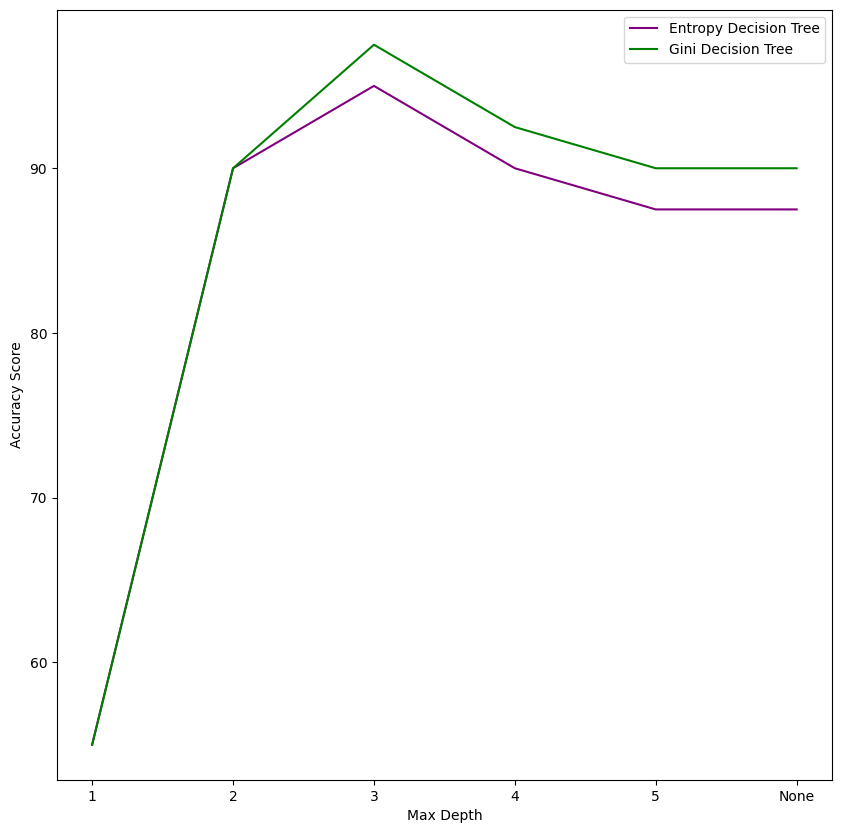

In [688]:
max_depths = [f'{i+1}' for i in range(5)]
max_depths.append('None')
plt.figure(figsize=(10,10))
plt.plot(max_depths, entropy_accuracies, label='Entropy Decision Tree', color='purple')
plt.plot(max_depths, gini_accuracies, label='Gini Decision Tree', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

As we can see, for a very low max_depth like 1, the tree can't split the data completely which leads to underfitting and weak accuracy score. By increasing the max_depth, the models get more complex which leads to less train error and prevent underfitting, but also increase the chance of overfitting, as it can be seen from the results, with more than 3 max_depth the accuracies fall for both decision trees with entropy and gini which means it's overfitting. And we can see that the accuracy of max_depth=5 for both trees are equal to trees with no limit on max_depth because we only have 5 features to split the data using branches of trees.

## P4: Ensemble Models

### P4-1: Bagging

Implement the bagging algorithm for classification from scratch **(P4-1-1: 15 points)**

In [689]:
class BaggingDecisionTree:
     
    def __init__(self, bootstraped_training_num=50, predictors_num=50):
        """
        Parameters:
        
        bootstraped_training_num -- The number of training sets we are gonna have
        predictors_num -- The number of predictors we want to use for each test sample
        """

        self.bootstraped_training_num = bootstraped_training_num
        self.predictors_num = predictors_num
        self.classifiers = []
    
    def fit(self, X, y):
        """
        Create `self.bootstraped_training_num` training sets by random sampling of the input training elements with replacement.
        Then create the same number of classifiers and fit each classifier on the corresponding training set.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        """

        n_samples = X.shape[0]
        for i in range(self.bootstraped_training_num):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_boot = X[indices]
            y_boot = y[indices]
            clf = DecisionTree()
            clf.fit(X_boot, y_boot)
            self.classifiers.append(clf)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        y = []
        n_samples = X.shape[0]
        for i in range(n_samples):
            x = np.array([X[i], np.zeros(5)])
            predictors = np.random.choice(self.classifiers, size=self.predictors_num, replace=False)
            predictions = [predictor.predict(x)[0] for predictor in predictors]
            y.append(np.bincount(predictions).argmax())
        
        return y

Create an instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=50` and fit it on the training data **(P4-1-2: 3 points)**

In [713]:
bdt1 = BaggingDecisionTree(50, 50)
bdt1.fit(x_train, y_train)

Create another instance of the BaggingDecisionTree class with `bootstraped_training_num=50`, `predictors_num=7` and fit it on the training data **(P4-1-3: 2 points)**

In [717]:
bdt2 = BaggingDecisionTree(50, 7)
bdt2.fit(x_train, y_train)

Test the created models on the test set. Discuss differences of two approaches we adopted. **(P4-1-4: 5 points)**

In [718]:
y_pred_bdt1 = bdt1.predict(x_test)
y_pred_bdt2 = bdt2.predict(x_test)

In [719]:
print(f'BDT with 50 trainig num and 50 predictors num accuracy: {accuracy_score(y_pred_bdt1, y_test)}')
print(f'BDT with 50 trainig num and 7 predictors num accuracy: {accuracy_score(y_pred_bdt2, y_test)}')

BDT with 50 trainig num and 50 predictors num accuracy: 95.0
BDT with 50 trainig num and 7 predictors num accuracy: 90.0


As we discussed in the last part, the Decision tree without any max_depth will overfit on the trainig data which leads to low accuracy. By bagging we try to lower the variance making different trees and prevent overfitting doing so. As it can be seen, the results improved considerebly compare to entropy decision tree with no max_depth limit. And we can see that the accuracy of using more predictors is higher as it's trying harder to prevent overfitting.

### P4-2: Boosting

Implement the Adaboost algorithm for classification from scratch **(P4-2-1: 10 points)**

In [700]:
class AdaBoost:
     
    def __init__(self, weak_classifiers_count=50, decision_tree=DecisionTreeClassifier):
        """
        Parameters:
        weak_classifiers_count -- The number of weak classifiers we are gonna have
        """
        self.weak_classifiers_count = weak_classifiers_count
        self.weak_classifiers = []
        self.weak_weights = []
        self.dt = decision_tree
        self.n_classes = 0
    
    def fit(self, X, y):
        """
        Fit the Adaboost on training data. take DecisionTree with max_depth of 1 as your weak classifier.
        
        Paramters:
        X : training features array
        y : target array
        
        Returns:
        self : Fitted estimator
        
        """
        n_samples, n_features = X.shape
        self.n_classes = len(np.unique(y))
        sample_weights = np.ones(n_samples) / n_samples
        for i in range(self.weak_classifiers_count):
            weak_classifier = self.dt(max_depth=1)
            weak_classifier.fit(X, y, sample_weights)
            y_pred = weak_classifier.predict(X)
            error_rate = np.sum(sample_weights[y != y_pred]) / np.sum(sample_weights)
            weak_weight = np.log((1 - error_rate) / error_rate)
            sample_weights *= np.exp(weak_weight * (y != y_pred))
            sample_weights /= np.sum(sample_weights)
            self.weak_classifiers.append(weak_classifier)
            self.weak_weights.append(weak_weight)
        
        return self
    
    def predict(self, X):
        """
        Predict class value for X using mavority voting of `self.predictors_num` classifiers.

        Paramters:
        X : training features array
        
        Returns:
        y : The predicted classes
        """
        y = []
        for x in X:
            classes_votes = [0 for _ in range(self.n_classes)]
            for weak_classifier, weak_weight in zip(self.weak_classifiers, self.weak_weights):
                classes_votes[weak_classifier.predict([x])[0] - 1] += weak_weight
            y.append(np.argmax(classes_votes) + 1)
        
        return y

Create an instance of Adaboost and fit it to the data **(P4-2-2: 2 points)**

In [705]:
ab1 = AdaBoost()
ab2 = AdaBoost(decision_tree=DecisionTree)
ab1.fit(x_train, y_train)
ab2.fit(x_train, y_train)

Test Adaboost on the testing set **(P4-2-3: 3 points)**

In [706]:
y_pred_ab_1 = ab1.predict(x_test)
y_pred_ab_2 = ab2.predict(x_test)

In [707]:
accuracy_score(y_pred_ab_2, y_test)

55.00000000000001

In [708]:
accuracy_score(y_pred_ab_1, y_test)

92.5